In [2]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [3]:
# Generate synthetic linear data
n_samples = 200
n_features = 1

X = np.random.rand(n_samples, n_features) * 10
true_coef = 3.5
true_intercept = 2.0

noise = np.random.normal(0, 1.0, size=n_samples)
y = true_coef * X[:, 0] + true_intercept + noise

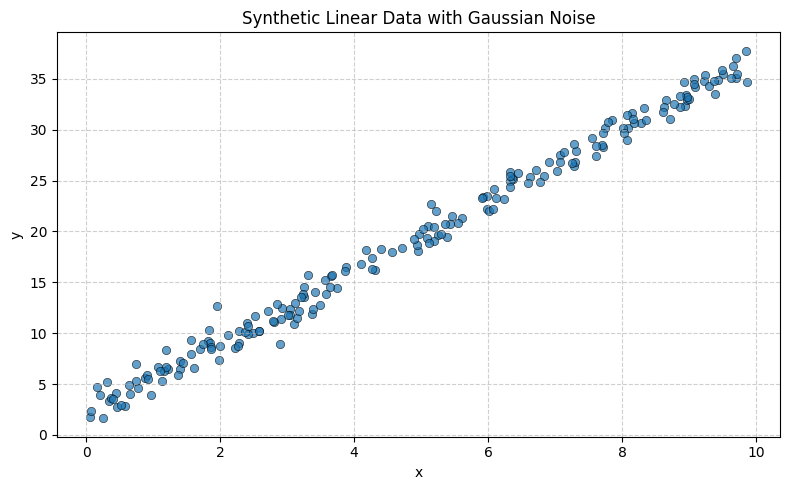

In [6]:
plt.figure(figsize=(8, 5))

plt.scatter(
    X[:, 0],
    y,
    alpha=0.7,
    edgecolor="k",
    linewidth=0.5
)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Linear Data with Gaussian Noise")

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [7]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=RANDOM_STATE
)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [9]:
coef = model.coef_[0]
intercept = model.intercept_

coef, intercept

(np.float64(3.5104703580427836), np.float64(2.0145372544355595))

In [11]:
y_val_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

mse, r2

(1.0846238625454694, 0.9894091314251133)

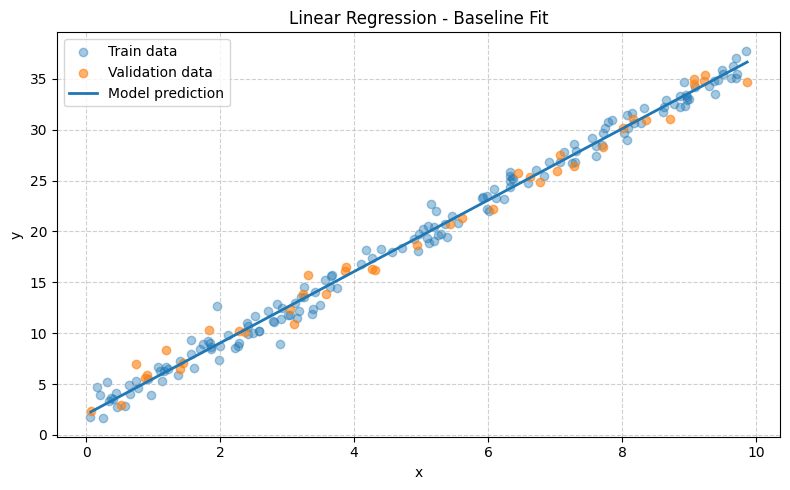

In [14]:
# Sort for a clean line plot
idx = np.argsort(X_val[:, 0])
X_val_sorted = X_val[idx]
y_val_sorted = y_val[idx]
y_val_pred_sorted = y_val_pred[idx]

plt.figure(figsize=(8, 5))

plt.scatter(
    X_train[:, 0],
    y_train,
    alpha=0.4,
    label="Train data"
)

plt.scatter(
    X_val[:, 0],
    y_val,
    alpha=0.6,
    label="Validation data"
)

plt.plot(
    X_val_sorted[:, 0],
    y_val_pred_sorted,
    linewidth=2,
    label="Model prediction"
)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression - Baseline Fit")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()